In [37]:
#matplotlib line
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [39]:
df=pd.read_csv('C:\\Users\\Jalwa-TVC\\Desktop\\W-H.csv')
df.head()

,Gender,Height,Weight
0,Male,5.2,50
1,Male,4.8,45
2,Male,6.0,75
3,Male,5.8,95
4,Male,6.5,80


In [40]:
x=df[['Height']].values
y_true=df[['Weight']].values

In [41]:
def line(x,w=0,b=0):
    return w*x+b

def mean_squared_error(y_true,y_pred):
    s=(y_true-y_pred)**2
    return np.sqrt(s.mean())

Text(0.5, 0, 'b')

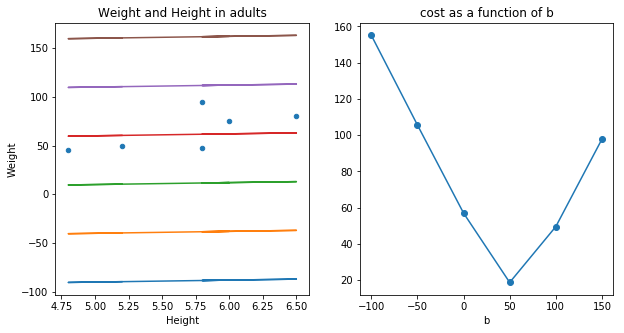

In [42]:
plt.figure(figsize=(10,5))
axl=plt.subplot(121)
df.plot(kind='scatter',
       x='Height',
       y='Weight',
       title='Weight and Height in adults',ax=axl)
bs=np.array([-100,-50,0,50,100,150])
mses=[]
for b in bs:
    y_pred=line(x,w=2,b=b)
    mse=mean_squared_error(y_true,y_pred)
    mses.append(mse)
    plt.plot(x,y_pred)
    
ax2=plt.subplot(122)
plt.plot(bs,mses,'o-')
plt.title('cost as a function of b')
plt.xlabel('b')

In [17]:
#liner Regression with keras


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD

#matplotlib line

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [44]:
x=df[['Height']].values
y_true=df[['Weight']].values

In [45]:
x

array([[5.2],
       [4.8],
       [6. ],
       [5.8],
       [6.5],
       [5.8]])

In [46]:
x.shape

(6, 1)

In [47]:
model=Sequential()
model.add(Dense(1,input_shape=(1,)))

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(Adam(lr=0.8),'mean_squared_error')

In [50]:
model.fit(x,y_true,epochs=40)

Train on 6 samples
Epoch 1/40
6/6 [==============================] - 0s 36ms/sample - loss: 5041.3687
Epoch 2/40
6/6 [==============================] - 0s 333us/sample - loss: 4327.8774
Epoch 3/40
6/6 [==============================] - 0s 2ms/sample - loss: 3673.7751
Epoch 4/40
6/6 [==============================] - 0s 500us/sample - loss: 3079.8826
Epoch 5/40
6/6 [==============================] - 0s 1ms/sample - loss: 2546.6726
Epoch 6/40
6/6 [==============================] - 0s 333us/sample - loss: 2074.1799
Epoch 7/40
6/6 [==============================] - 0s 1ms/sample - loss: 1661.9385
Epoch 8/40
6/6 [==============================] - 0s 833us/sample - loss: 1308.9056
Epoch 9/40
6/6 [==============================] - 0s 333us/sample - loss: 1013.3820
Epoch 10/40
6/6 [==============================] - 0s 333us/sample - loss: 772.9494
Epoch 11/40
6/6 [==============================] - 0s 1ms/sample - loss: 584.4246
Epoch 12/40
6/6 [==============================] - 0s 667us/sample

In [51]:
y_pred=model.predict(x)

In [52]:
y_pred

array([[59.52857 ],
       [55.690506],
       [67.2047  ],
       [65.28567 ],
       [72.00228 ],
       [65.28567 ]], dtype=float32)

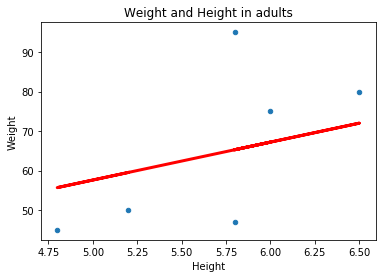

In [53]:
df.plot(kind='scatter',
       x='Height',
       y='Weight', 
        title='Weight and Height in adults')
plt.plot(x,y_pred,color='red',linewidth=3)

In [54]:
w,b=model.get_weights()

In [55]:
w

array([[9.5951605]], dtype=float32)

In [56]:
b

array([9.633737], dtype=float32)

In [57]:
model.predict([[200]])

array([[1928.6659]], dtype=float32)